# Tweets from twitter sentiment analysis

In [1]:
# Importing necessary libraries

In [2]:
import pandas as pd
import tweepy
import re

In [3]:
# Using the consumer keys and access key to extract the tweets from twitter

In [4]:
consumer_key = "YjpUMq8F0Vc15DrmDT1dVNHYO"
consumer_secret = "hqqKizfetGcQGDziLVHguaBRMKqujnC98GRzp4BaVWIy2YdtQi"
access_key = "2821184361-nI4ZUrqAhJ3bQq0e15rUuFMXbHTK3VuJvIoVWHp"
access_secret = "ltXVMn0Iqn7GJnJwFXUDDIxgB7Zw4ne0uL8B1qzlcjj47"

## Tweet extraction

In [5]:
alltweets = []

In [6]:
# Defining the function to get the tweets

In [7]:
def get_all_tweets(screen_name):
    auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = tweepy.API(auth)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    alltweets.extend(new_tweets)
    
    oldest = alltweets[-1].id - 1
    while len(new_tweets)>0:
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        #save most recent tweets
        alltweets.extend(new_tweets)
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        print ("...%s tweets downloaded so far" % (len(alltweets)))                # tweet.get('user', {}).get('location', {})
 
    outtweets = [[tweet.created_at,tweet.entities["hashtags"],tweet.entities["user_mentions"],tweet.favorite_count,
                  tweet.geo,tweet.id_str,tweet.lang,tweet.place,tweet.retweet_count,tweet.retweeted,tweet.source,tweet.text,
                  tweet._json["user"]["location"],tweet._json["user"]["name"],tweet._json["user"]["time_zone"],
                  tweet._json["user"]["utc_offset"]] for tweet in alltweets]
     
    tweets_df = pd.DataFrame(columns = ["time","hashtags","user_mentions","favorite_count",
                                    "geo","id_str","lang","place","retweet_count","retweeted","source",
                                    "text","location","name","time_zone","utc_offset"])
    tweets_df["time"]  = pd.Series([str(i[0]) for i in outtweets])
    tweets_df["hashtags"] = pd.Series([str(i[1]) for i in outtweets])
    tweets_df["user_mentions"] = pd.Series([str(i[2]) for i in outtweets])
    tweets_df["favorite_count"] = pd.Series([str(i[3]) for i in outtweets])
    tweets_df["geo"] = pd.Series([str(i[4]) for i in outtweets])
    tweets_df["id_str"] = pd.Series([str(i[5]) for i in outtweets])
    tweets_df["lang"] = pd.Series([str(i[6]) for i in outtweets])
    tweets_df["place"] = pd.Series([str(i[7]) for i in outtweets])
    tweets_df["retweet_count"] = pd.Series([str(i[8]) for i in outtweets])
    tweets_df["retweeted"] = pd.Series([str(i[9]) for i in outtweets])
    tweets_df["source"] = pd.Series([str(i[10]) for i in outtweets])
    tweets_df["text"] = pd.Series([str(i[11]) for i in outtweets])
    tweets_df["location"] = pd.Series([str(i[12]) for i in outtweets])
    tweets_df["name"] = pd.Series([str(i[13]) for i in outtweets])
    tweets_df["time_zone"] = pd.Series([str(i[14]) for i in outtweets])
    tweets_df["utc_offset"] = pd.Series([str(i[15]) for i in outtweets])
    tweets_df.to_csv(screen_name+"_tweets.csv")
    return tweets_df

In [8]:
# Extracting tweets of "Elon Musk"

In [10]:
elon_tweets = get_all_tweets("elonmusk")

...400 tweets downloaded so far
...600 tweets downloaded so far
...800 tweets downloaded so far
...1000 tweets downloaded so far
...1199 tweets downloaded so far
...1399 tweets downloaded so far
...1599 tweets downloaded so far
...1799 tweets downloaded so far
...1999 tweets downloaded so far
...2199 tweets downloaded so far
...2399 tweets downloaded so far
...2599 tweets downloaded so far
...2799 tweets downloaded so far
...2999 tweets downloaded so far
...3199 tweets downloaded so far
...3240 tweets downloaded so far
...3240 tweets downloaded so far


In [11]:
# Checking the extracted tweets

In [12]:
elon_tweets

,time,hashtags,user_mentions,favorite_count,geo,id_str,lang,place,retweet_count,retweeted,source,text,location,name,time_zone,utc_offset
0,2020-10-30 05:55:47,[],"[{'screen_name': 'ajtourville', 'name': 'ALEX ...",580,None,1322054574908342272,und,None,24,False,Twitter for iPhone,@ajtourville @EndelSound @Grimezsz https://t.c...,,Elon Musk,None,None
1,2020-10-30 03:05:46,[],"[{'screen_name': 'bluemoondance74', 'name': 'R...",1679,None,1322011788926455808,en,None,89,False,Twitter for iPhone,@bluemoondance74 @SpacePadreIsle Some challeng...,,Elon Musk,None,None
2,2020-10-30 02:46:57,[],"[{'screen_name': 'SpacePadreIsle', 'name': 'SP...",13518,None,1322007049715163137,en,None,172,False,Twitter for iPhone,@SpacePadreIsle Great shot!,,Elon Musk,None,None
3,2020-10-29 23:41:21,[],"[{'screen_name': 'EndelSound', 'name': 'Endel'...",2966,None,1321960342776238080,en,None,63,False,Twitter for iPhone,@EndelSound @Grimezsz Future AI will appreciat...,,Elon Musk,None,None
4,2020-10-29 18:41:35,[],"[{'screen_name': 'Teslarati', 'name': 'TESLARA...",8391,None,1321884904590774272,en,None,487,False,Twitter for iPhone,@Teslarati Truth is stranger than fiction,,Elon Musk,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,2019-12-22 19:47:53,[],"[{'screen_name': 'teslaownersSV', 'name': 'Tes...",1614,None,1208836576521814016,en,None,83,False,Twitter for iPhone,"@teslaownersSV @cgpgrey Sorry, it’s been a bit...",,Elon Musk,None,None
3236,2019-12-22 19:38:51,[],"[{'screen_name': 'cgpgrey', 'name': 'CGP Grey ...",12144,None,1208834303003516928,en,None,302,False,Twitter for iPhone,@cgpgrey My wiki is a war zone with a zillion ...,,Elon Musk,None,None
3237,2019-12-22 19:32:25,[],"[{'screen_name': 'RenataKonkoly', 'name': 'Ren...",7663,None,1208832682693541888,und,None,111,False,Twitter for iPhone,@RenataKonkoly Yes 🤣♥️,,Elon Musk,None,None
3238,2019-12-22 19:30:32,[],"[{'screen_name': 'TechnologicAli', 'name': 'Al...",12274,None,1208832207801872385,en,None,820,False,Twitter for iPhone,@TechnologicAli Started Zip2 with ~$2k &amp; ~...,,Elon Musk,None,None


In [13]:
# Extracting only the 'text' section of the tweet

In [14]:
elon_tweets["text"]

0       @ajtourville @EndelSound @Grimezsz https://t.c...
1       @bluemoondance74 @SpacePadreIsle Some challeng...
2                             @SpacePadreIsle Great shot!
3       @EndelSound @Grimezsz Future AI will appreciat...
4               @Teslarati Truth is stranger than fiction
                              ...                        
3235    @teslaownersSV @cgpgrey Sorry, it’s been a bit...
3236    @cgpgrey My wiki is a war zone with a zillion ...
3237                               @RenataKonkoly Yes 🤣♥️
3238    @TechnologicAli Started Zip2 with ~$2k &amp; ~...
3239    If Tesla &amp; SpaceX go bankrupt, so will I. ...
Name: text, Length: 3240, dtype: object

In [15]:
# Combining all the tweets into a single paragraph

In [16]:
tweet_df = " ".join(elon_tweets["text"])
tweet_df

'@ajtourville @EndelSound @Grimezsz https://t.co/2hx6tlA8F7 @bluemoondance74 @SpacePadreIsle Some challenges with high winds. Looks like Sunday for static fire. @SpacePadreIsle Great shot! @EndelSound @Grimezsz Future AI will appreciate this @Teslarati Truth is stranger than fiction @waitbutwhy 😉 @universal_sci Urf is so smōl @homantse28 For a long time Truth be told, I’ve eaten at JitB many times over the years, even the teriyaki bowl Might buy a Jack in the Box footstool @skorusARK Approximately, log(rate) @challengerST Same bot, just change setting to “combat” @SamTalksTesla Well, being a phased array antenna, it is actually rather flat! Tesla should make 🔥 catgirl robots? @MachinePix Little crane: “Am I just a toy to you!?” @coffeemaestro_ 🤣🤣 Come here … no, come, here 👇 Wow, this mayo sure is salty! @PPathole @pcgamer Max Payne was great on many levels. Silent Hill good too. Jack in the Box should do double duty as a sperm donor clinic — name is 👌 @TheWPMontgomery @pcgamer One of 

## Text processing

In [17]:
# Removing all the http links from the tweets

In [18]:
tweet_df = re.sub(r"http\S+", "", tweet_df)
tweet_df

'@ajtourville @EndelSound @Grimezsz  @bluemoondance74 @SpacePadreIsle Some challenges with high winds. Looks like Sunday for static fire. @SpacePadreIsle Great shot! @EndelSound @Grimezsz Future AI will appreciate this @Teslarati Truth is stranger than fiction @waitbutwhy 😉 @universal_sci Urf is so smōl @homantse28 For a long time Truth be told, I’ve eaten at JitB many times over the years, even the teriyaki bowl Might buy a Jack in the Box footstool @skorusARK Approximately, log(rate) @challengerST Same bot, just change setting to “combat” @SamTalksTesla Well, being a phased array antenna, it is actually rather flat! Tesla should make 🔥 catgirl robots? @MachinePix Little crane: “Am I just a toy to you!?” @coffeemaestro_ 🤣🤣 Come here … no, come, here 👇 Wow, this mayo sure is salty! @PPathole @pcgamer Max Payne was great on many levels. Silent Hill good too. Jack in the Box should do double duty as a sperm donor clinic — name is 👌 @TheWPMontgomery @pcgamer One of the best games ever @Th

In [19]:
# Removing all the puntuations, numbers and lowering the case of  letters

In [20]:
tweets = re.sub("[^A-Za-z" "]+"," ",tweet_df).lower()
tweets = re.sub("[0-9" "]+"," ",tweets)
tweets

' ajtourville endelsound grimezsz bluemoondance spacepadreisle some challenges with high winds looks like sunday for static fire spacepadreisle great shot endelsound grimezsz future ai will appreciate this teslarati truth is stranger than fiction waitbutwhy universal sci urf is so sm l homantse for a long time truth be told i ve eaten at jitb many times over the years even the teriyaki bowl might buy a jack in the box footstool skorusark approximately log rate challengerst same bot just change setting to combat samtalkstesla well being a phased array antenna it is actually rather flat tesla should make catgirl robots machinepix little crane am i just a toy to you coffeemaestro come here no come here wow this mayo sure is salty ppathole pcgamer max payne was great on many levels silent hill good too jack in the box should do double duty as a sperm donor clinic name is thewpmontgomery pcgamer one of the best games ever thatdudeshannon pcgamer fear with modern graphics amp sound would roc

In [21]:
# Splitting the paragraph into words

In [22]:
tweet_words = tweets.split(" ")
tweet_words

['',
 'ajtourville',
 'endelsound',
 'grimezsz',
 'bluemoondance',
 'spacepadreisle',
 'some',
 'challenges',
 'with',
 'high',
 'winds',
 'looks',
 'like',
 'sunday',
 'for',
 'static',
 'fire',
 'spacepadreisle',
 'great',
 'shot',
 'endelsound',
 'grimezsz',
 'future',
 'ai',
 'will',
 'appreciate',
 'this',
 'teslarati',
 'truth',
 'is',
 'stranger',
 'than',
 'fiction',
 'waitbutwhy',
 'universal',
 'sci',
 'urf',
 'is',
 'so',
 'sm',
 'l',
 'homantse',
 'for',
 'a',
 'long',
 'time',
 'truth',
 'be',
 'told',
 'i',
 've',
 'eaten',
 'at',
 'jitb',
 'many',
 'times',
 'over',
 'the',
 'years',
 'even',
 'the',
 'teriyaki',
 'bowl',
 'might',
 'buy',
 'a',
 'jack',
 'in',
 'the',
 'box',
 'footstool',
 'skorusark',
 'approximately',
 'log',
 'rate',
 'challengerst',
 'same',
 'bot',
 'just',
 'change',
 'setting',
 'to',
 'combat',
 'samtalkstesla',
 'well',
 'being',
 'a',
 'phased',
 'array',
 'antenna',
 'it',
 'is',
 'actually',
 'rather',
 'flat',
 'tesla',
 'should',
 'make',

In [23]:
len(tweet_words)

33613

In [24]:
# Importing the stop words

In [25]:
with open(r"D:\Data science\Python codes\Data sets\NLP words list\stopwords.txt","r") as sw:
    stopwords = sw.read()

In [26]:
stopwords = stopwords.split("\n")
stopwords=stopwords[6:]
stopwords

['a',
 'about',
 'above',
 'across',
 'after',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'among',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyone',
 'anything',
 'anywhere',
 'are',
 'area',
 'areas',
 'around',
 'as',
 'ask',
 'asked',
 'asking',
 'asks',
 'at',
 'away',
 'b',
 'back',
 'backed',
 'backing',
 'backs',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'been',
 'before',
 'began',
 'behind',
 'being',
 'beings',
 'best',
 'better',
 'between',
 'big',
 'both',
 'but',
 'by',
 'c',
 'came',
 'can',
 'cannot',
 'case',
 'cases',
 'certain',
 'certainly',
 'clear',
 'clearly',
 'come',
 'could',
 'd',
 'did',
 'differ',
 'different',
 'differently',
 'do',
 'does',
 'done',
 'down',
 'down',
 'downed',
 'downing',
 'downs',
 'during',
 'e',
 'each',
 'early',
 'either',
 'end',
 'ended',
 'ending',
 'ends',
 'enough',
 'even',
 'evenly',
 'ever',
 'every',
 'everybody',
 'everyone',
 'everything',

In [27]:
# Removing all the stop words from the tweets

In [28]:
tweets_final = [w for w in tweet_words if not w in stopwords]
tweets_final

['ajtourville',
 'endelsound',
 'grimezsz',
 'bluemoondance',
 'spacepadreisle',
 'challenges',
 'winds',
 'looks',
 'sunday',
 'static',
 'fire',
 'spacepadreisle',
 'shot',
 'endelsound',
 'grimezsz',
 'future',
 'ai',
 'appreciate',
 'teslarati',
 'truth',
 'stranger',
 'fiction',
 'waitbutwhy',
 'universal',
 'sci',
 'urf',
 'sm',
 'homantse',
 'time',
 'truth',
 'told',
 've',
 'eaten',
 'jitb',
 'times',
 'teriyaki',
 'bowl',
 'buy',
 'jack',
 'box',
 'footstool',
 'skorusark',
 'approximately',
 'log',
 'rate',
 'challengerst',
 'bot',
 'change',
 'setting',
 'combat',
 'samtalkstesla',
 'phased',
 'array',
 'antenna',
 'actually',
 'flat',
 'tesla',
 'catgirl',
 'robots',
 'machinepix',
 'little',
 'crane',
 'am',
 'toy',
 'coffeemaestro',
 'wow',
 'mayo',
 'salty',
 'ppathole',
 'pcgamer',
 'max',
 'payne',
 'levels',
 'silent',
 'hill',
 'jack',
 'box',
 'double',
 'duty',
 'sperm',
 'donor',
 'clinic',
 'name',
 'thewpmontgomery',
 'pcgamer',
 'games',
 'thatdudeshannon',
 '

In [29]:
len(tweets_final)

20038

#### There are total 20038 words in the tweet

In [30]:
# Joining all the tweet words into one paragraph

In [31]:
tweets_final_string = " ".join(tweets_final)
tweets_final_string

'ajtourville endelsound grimezsz bluemoondance spacepadreisle challenges winds looks sunday static fire spacepadreisle shot endelsound grimezsz future ai appreciate teslarati truth stranger fiction waitbutwhy universal sci urf sm homantse time truth told ve eaten jitb times teriyaki bowl buy jack box footstool skorusark approximately log rate challengerst bot change setting combat samtalkstesla phased array antenna actually flat tesla catgirl robots machinepix little crane am toy coffeemaestro wow mayo salty ppathole pcgamer max payne levels silent hill jack box double duty sperm donor clinic name thewpmontgomery pcgamer games thatdudeshannon pcgamer fear modern graphics amp sound rock matthewgarcia pcgamer ok zzcool pcgamer games thread scarier amp creatively horror movie pcgamer fear imo dead space haunt dreams rakyll jgrano flcnhvy knowledge literally zero equipment usable major repairs upgra flcnhvy left broken bots amp equipment hardly worth scrap metal value scrounged spa flcnhvy

## Sentimental analysis

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [33]:
# Plotting a wordcloud with all the unique words in the tweets

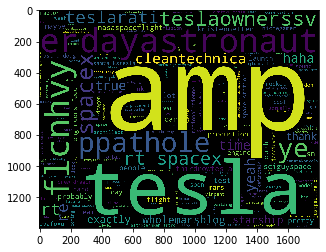

In [34]:
wordcloud_tweet = WordCloud(
                    background_color="black",
                    width=1800,
                    height=1400,
                    ).generate(tweets_final_string)
plt.imshow(wordcloud_tweet)

#### 'amp', 'tesla', 'pathole' are some of the most frequently used words

In [35]:
# List of all the unique words in the reviews

In [36]:
tweet_unique = list(set("".join(tweets_final_string).split(" ")))
tweet_unique

['buildings',
 'intention',
 'quest',
 'prior',
 'superclusterhq',
 'battle',
 'gamgee',
 'po',
 'releasing',
 'internetofshit',
 'stated',
 'jwitt',
 'mstrwilliam',
 'archillect',
 'aeax',
 'chy',
 'lo',
 'champion',
 'edludlow',
 'static',
 'sill',
 'lose',
 'possessions',
 'steep',
 'foxbusiness',
 'gaelic',
 'marcelzimmer',
 'payout',
 'dna',
 'doug',
 'asia',
 'receiving',
 'martiandays',
 'closers',
 'inzilya',
 'hepa',
 'newton',
 'usable',
 'physically',
 'allowing',
 'gravity',
 'excited',
 'teslapodcast',
 'saying',
 'mars',
 'experts',
 'indiealexh',
 'emissions',
 'alexmd',
 'sad',
 'grid',
 'experimental',
 'safety',
 'earn',
 'bioweapon',
 'sacrifice',
 'predictions',
 'nominating',
 'markets',
 'eye',
 'facto',
 'eaten',
 'transfer',
 'peace',
 'ad',
 'electrekco',
 'tall',
 'officialmcafee',
 'emoji',
 'techau',
 'viruses',
 'serve',
 'ama',
 'enj',
 'targeted',
 'mission',
 'votelabonte',
 'chore',
 'con',
 'ryan',
 'insid',
 'fishy',
 'immediately',
 'earnest',
 'rapt

In [37]:
len(tweet_unique)

5960

In [38]:
# Importing the positive words

In [39]:
with open(r"D:\Data science\Python codes\Data sets\NLP words list\positive-words.txt","r") as pos:
    poswords= pos.read().split("\n")

In [40]:
poswords = poswords[36:]

In [41]:
# Importing the negative words

In [42]:
with open(r"D:\Data science\Python codes\Data sets\NLP words list\negative-words.txt","r") as neg:
    negwords = neg.read().split("\n")

In [43]:
negwords = negwords[37:]

In [46]:
# Joining all the negative words into a paragraph

In [45]:
tweet_neg = " ".join([w for w in tweets_final if w in negwords])
tweet_neg

'static stranger fiction fear scarier fear dead haunt broken scrap trash critical strident issue loss limited cold issues slow static lost restriction failed bugs tension slow hurt weak bad grief stuck hard limited limited poor sketchy odd false failure mistake costly false complicated crash critical bankrupt agony die marginal hard crazy dense issues louder wildly incorrect wild unexpected latency thicker hard suspect irony emergency broke tanks bad inaccurate slow virus ludicrous dumb challenging difficulty bugs pointless incorrectly utterly insane irrational funny insane fallout error fallout boring obscure warp suicide static static tricky sorry hard bs moron lurch limit bombard hang sorry critical embarrassing unfortunately overweight unlikely die false critical impossible trivial impossible trivial intense boring wild attack obtuse lengthy frozen addicted sorry noise farcical hard error limit tension worst dirt hard sting wrong bs worst tanks trash begging fudge hard hasty trappe

In [48]:
len(tweet_neg)

4957

In [49]:
# Builiding wordcloud of negative words

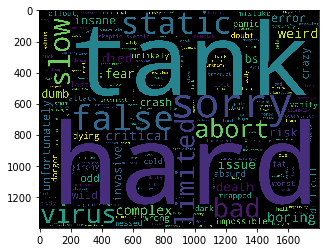

In [50]:
wordcloud_neg = WordCloud(
                    background_color="black",
                    width=1800,
                    height=1400,
                    ).generate(tweet_neg)
plt.imshow(wordcloud_neg)

#### 'tank', 'hard', 'bad' and 'abort' are some of the most frequently negative words in the tweets

In [51]:
# Joining all the positive words into a paragraph

In [52]:
tweet_pos= " ".join([w for w in tweets_final if w in poswords])
tweet_pos

'appreciate wow silent modern usable worth helpful excellent congratulations meaningful top improves approve proving hot accurate helpful pretty accurate cool wow creative free conveniently gem congratulations progress roomy simplified sweet nice love freedom upgraded supporting success tough thank accurate appreciate promised accurate intelligence glad safe wow accurate tough rich glorify pretty protect improve proud leads advanced pretty won sexy impressive progress amazing welcome competitive advantage inspiration fine succeeded fairly subsidize favorite tough outstanding awesome liked pretty cool improvements glad improve glad inspiring cool improve fast glad cool super appreciate super cool support safe appealing cool pretty support tough faster fine mature pretty efficient pretty exceptional achievement success worth love strong upgraded advantage stainless winning gaining usable pretty accurate improvements awesome incredible excitement support appreciated cool exciting super ef

In [53]:
len(tweet_pos)

7487

In [54]:
# Builiding wordcloud of positive words

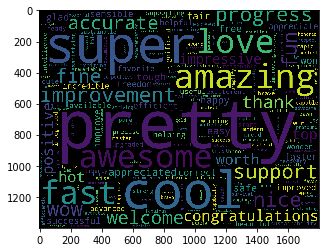

In [55]:
wordcloud_pos = WordCloud(
                background_color="black",
                width=1800,
                height=1400,
                ).generate(tweet_pos)
plt.imshow(wordcloud_pos)

#### 'pretty', 'amazing', 'cool' and 'super' are some of the most frequently used positive words

#### Observations
The number of positive words are higher compared to number of negative words in the tweets.

Most frequently used positive words like 'super', 'amazing' and 'pretty' indicates that the tweets of 'elon musk' is very positive and optimistic.

Most frequently used negative words like 'hard', 'abort' and 'sorry' indicates that some of his tweets also consists of negative emotions.
 
Overall, with the positive words like 'super', 'amazing', 'cool' and 'awesome' its clear that 'Elon Musk' and his tweets have more positive and optimistic words.